In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Models performace.xls to Models performace (1).xls


In [ ]:
import pandas as pd

# Load the Excel file
file_path = 'Models performace (1).xls'


# Load Pr sheet into a DataFrame
pr_df = pd.read_excel(file_path, sheet_name='Pr')

# Drop rows with NaN values in 'Models' column
pr_df = pr_df.dropna(subset=['Models'])

# Define normalization function
def normalize(metric, min_value, max_value):
    return (metric - min_value) / (max_value - min_value)

# Define weights for each metric (adjust according to available metrics)
weights = {
    'CC': 0.2,
    'NES': 0.2,
    'NRMSE': 0.3,
    'KGE': 0.2,
    'md': 0.1
}

# Normalize each available metric
for metric in weights.keys():
    if metric in pr_df.columns:
        min_value = pr_df[metric].min()
        max_value = pr_df[metric].max()
        pr_df[f'normalized_{metric}'] = pr_df[metric].apply(lambda x: normalize(x, min_value, max_value))
    else:
        print(f"Metric {metric} is missing from the DataFrame.")

# Calculate CRI
def calculate_cri(row, weights):
    cri = 0
    for metric, weight in weights.items():
        if f'normalized_{metric}' in row:
            cri += row[f'normalized_{metric}'] * weight
    return cri

pr_df['CRI'] = pr_df.apply(lambda row: calculate_cri(row, weights), axis=1)

# Rank models based on CRI
sorted_pr_models = pr_df.sort_values(by='CRI', ascending=False)

# Display the top model(s) for Pr
best_pr_model = sorted_pr_models.iloc[0]
print("Best Pr model based on CRI:", best_pr_model[['Models', 'CRI']])





Best Pr model based on CRI: Models    ACCES-CM2
CRI        0.601276
Name: 0, dtype: object


In [ ]:
Best model based on CRI: Models    INM-CM5-0
CRI         0.70882
Name: (Tmax, 11), dtype: object

Best Tmin model based on CRI: Models    FGOAL-gs
CRI        0.68946
Name: 8, dtype: object

Best Pr model based on CRI: Models    ACCES-CM2
CRI        0.601276
Name: 0, dtype: object


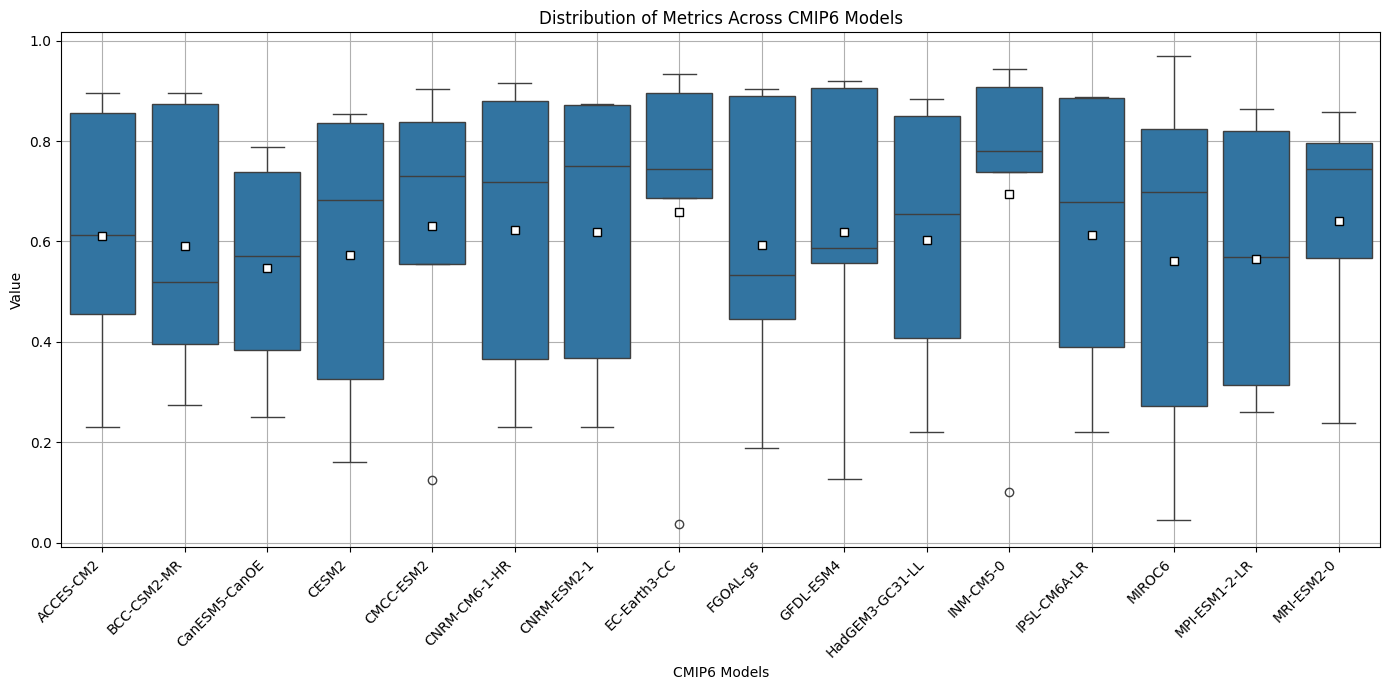

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data input as a dictionary
data = {
    'Model': ['ACCES-CM2', 'BCC-CSM2-MR', 'CanESM5-CanOE', 'CESM2', 'CMCC-ESM2',
              'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'EC-Earth3-CC', 'FGOAL-gs', 'GFDL-ESM4',
              'HadGEM3-GC31-LL', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-LR', 'MRI-ESM2-0'],
    'NSE': [0.455, 0.396, 0.383, 0.161, 0.556,
            0.366, 0.368, 0.686, 0.445, 0.557,
            0.407, 0.738, 0.390, 0.273, 0.261, 0.745],
    'NRMSE': [0.231, 0.274, 0.572, 0.327, 0.124,
              0.231, 0.231, 0.037, 0.189, 0.126,
              0.221, 0.10, 0.220, 0.97, 0.315, 0.568],
    'KGE': [0.613, 0.519, 0.250, 0.683, 0.730,
            0.719, 0.750, 0.745, 0.534, 0.587,
            0.655, 0.780, 0.679, 0.045, 0.570, 0.238],
    'Md': [0.896, 0.895, 0.789, 0.837, 0.903,
           0.880, 0.872, 0.934, 0.903, 0.920,
           0.884, 0.943, 0.886, 0.698, 0.863, 0.797],
    'CC': [0.856, 0.873, 0.738, 0.854, 0.838,
           0.915, 0.874, 0.895, 0.889, 0.906,
           0.850, 0.907, 0.887, 0.824, 0.821, 0.858]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to have a long-format DataFrame for seaborn
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Model', y='Value', data=df_melted, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

# Customize the plot
plt.title('Distribution of Metrics Across CMIP6 Models')
plt.xlabel('CMIP6 Models')
plt.ylabel('Value')
plt.xticks(rotation=45, ha="right")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
from google.colab import files
uploaded = files.upload()

Saving Models performace.xls to Models performace (2).xls


In [62]:
!apt-get install -y fonts-lyx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-lyx
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 159 kB of archives.
After this operation, 360 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-lyx all 2.3.6-1 [159 kB]
Fetched 159 kB in 0s (319 kB/s)
Selecting previously unselected package fonts-lyx.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-lyx_2.3.6-1_all.deb ...
Unpacking fonts-lyx (2.3.6-1) ...
Setting up fonts-lyx (2.3.6-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

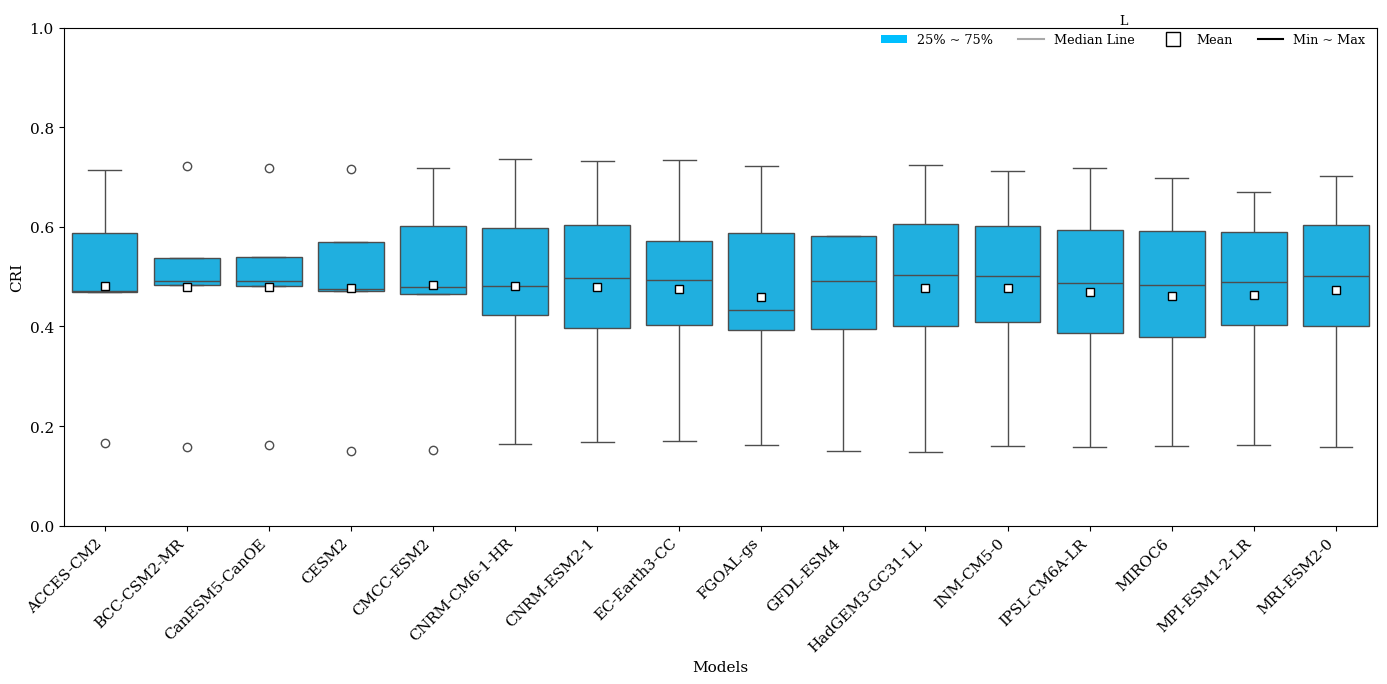

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from google.colab import files

# Set font globally to DejaVu Serif
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 11  # You can adjust the size as needed

# Load data from an Excel file with a specified sheet name
excel_file = 'Models performace (2).xls'  # Replace with your file name
sheet_name = 'Pr'  # Replace with your sheet name

# Read the sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Print the column names (optional, for debugging)
#print(df.columns.tolist())

# Melt the DataFrame to have a long-format DataFrame for seaborn
df_melted = df.melt(id_vars=['Models'], var_name='Metric', value_name='Value')

# Create the boxplot with the original light blue color
plt.figure(figsize=(14, 7))
sns.boxplot(x='Models', y='Value', data=df_melted, showmeans=True, color="deepskyblue",
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

# Customize the plot
plt.ylabel('CRI')  # Set y-axis label
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.ylim(0, 1)
# Set the background to white and disable grid
plt.gca().set_facecolor('white')
plt.grid(False)

# Adding custom legend
legend_elements = [
    mpatches.Patch(facecolor='deepskyblue', label='25% ~ 75%'),  # Box (Interquartile range)
    mlines.Line2D([], [], color='Darkgray', label='Median Line'),  # Median line
    mlines.Line2D([], [], color='Black', marker='s', linestyle='None', markersize=10,
                  markerfacecolor='white', markeredgecolor='black', label='Mean'),  # Mean marker
    mlines.Line2D([], [], color='black', linestyle='-', label='Min ~ Max')  # Whiskers (Min-Max)
]

# Position the legend in the upper right corner
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1.05),
           ncol=4, fontsize='small', title='L', title_fontsize='small', frameon=False)

# Adjust layout and save the plot
plt.tight_layout()

# Save the figure as a high-quality JPG file
plt.savefig("my_figure.jpg", format="jpg", dpi=300)  # Save as high-quality JPG file

# Download the figure
files.download("my_figure.jpg")

# Display the plot
plt.show()
